understand the one-mode projection of bipartite networks

# Setup an example

```mermaid
graph LR
a --1--> A
a --2--> B
b --3--> A
b --4--> B
c --5--> B
```

The above graph as two type of nodes: lower and upper.

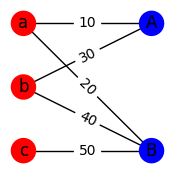

In [107]:
import pandas as pd
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [2, 2]


# Create example data like above
edges = pd.DataFrame(
    [
        ["a", "A", 10],
        ["a", "B", 20],
        ["b", "A", 30],
        ["b", "B", 40],
        ["c", "B", 50],
    ],
    columns=["source", "target", "weight"],
)
B = nx.from_pandas_edgelist(edges, edge_attr=True, create_using=nx.Graph())

source_nodes, target_nodes = bipartite.sets(B)
edge_labels = nx.get_edge_attributes(B, "weight")
node_colors = ["red" if n in source_nodes else "blue" for n in B.nodes()]

fig, ax = plt.subplots()
pos = nx.bipartite_layout(B, nodes=edges["source"].values)
nx.draw(B, pos=pos, with_labels=True, node_color=node_colors, ax=ax)
nx.draw_networkx_edge_labels(B, pos=pos, edge_labels=edge_labels, ax=ax)
plt.show()
bipartite_plot = ax.get_figure()

# `Networkx` methods

| methods | what? |
|---------|-------|
| `projected_graph` | Returns the projection of B onto one of its node sets. |
| `weighted_projected_graph` | Returns a weighted projection of B onto one of its node sets. |
| `collaboration_weighted_projected_graph` | Newman's weighted projection of B onto one of its node sets. |
| `overlap_weighted_projected_graph` | Overlap weighted projection of B onto one of its node sets. |
| `generic_weighted_projected_graph` | Weighted projection of B with a user-specified weight function |

## `projected_graph`

Only create links

[('c', 'b', {}), ('c', 'a', {}), ('b', 'a', {})]


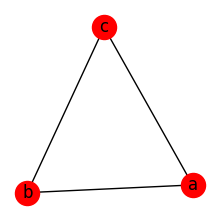

In [108]:
G = bipartite.projected_graph(B, source_nodes)
print(G.edges(data=True))
nx.draw(G, with_labels=True, node_color="red")

[('B', 'A', {})]


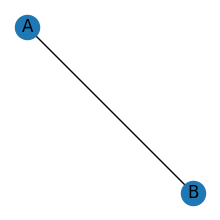

In [109]:
G = bipartite.projected_graph(B, target_nodes)
print(G.edges(data=True))
nx.draw(G, with_labels=True)

## `weighted_projected_graph` or simple couting

just counting the common neighbors

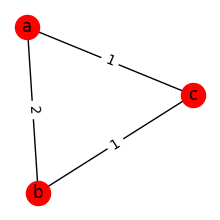

In [110]:
G = bipartite.weighted_projected_graph(B, source_nodes)

edge_labels = nx.get_edge_attributes(G, "weight")
pos = nx.spring_layout(G)
nx.draw(G, pos=pos, with_labels=True, node_color="red")
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)
plt.show()

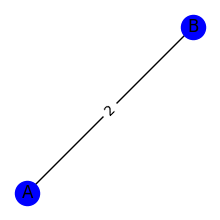

In [112]:
G = bipartite.weighted_projected_graph(B, target_nodes)

edge_labels = nx.get_edge_attributes(G, "weight")
pos = nx.spring_layout(G)
nx.draw(G, pos=pos, with_labels=True, node_color="blue")
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)
plt.show()


## `collaboration_weighted_projected_graph` or hyperbolic weighting


$$w_{u, v} = \sum_k \frac{\delta^k_u\delta^k_v}{d_k - 1}$$

where:
- $d_k$ is degree of node $k$
- $\delta_{u}^{k}$ is $1$ if node $u$ is linked to node $k$, $0$ otherwise

the projection weight is only care about the connectivity of nodes, without edges weights

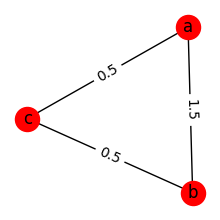

In [113]:
G = bipartite.collaboration_weighted_projected_graph(B, source_nodes)

edge_labels = nx.get_edge_attributes(G, "weight")
pos = nx.spring_layout(G)
nx.draw(G, pos=pos, with_labels=True, node_color="red")
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)
plt.show()

$$d_A = 2, d_B = 3$$

$$w_{a,b} = \frac{1\times1}{2 - 1} + \frac{1\times1}{3-1} = 1.5$$

$$w_{a,c} = \frac{1\times0}{2 - 1} + \frac{1\times1}{3-1} = 0.5$$

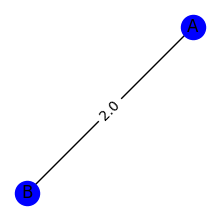

In [114]:
G = bipartite.collaboration_weighted_projected_graph(B, target_nodes)

edge_labels = nx.get_edge_attributes(G, "weight")
pos = nx.spring_layout(G)
nx.draw(G, pos=pos, with_labels=True, node_color="blue")
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)
plt.show()

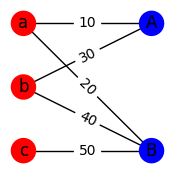

In [115]:
bipartite_plot

## `overlap_weighted_projected_graph`

like Intersec over Union. The official name is *Jaccard index*

$$w_{u,v} = \frac {\mid N(u) \cap N(v) \mid} {\mid N(u) \cup N(v) \mid}$$

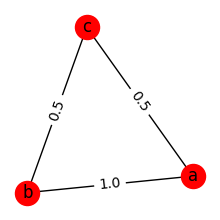

In [117]:
G = bipartite.overlap_weighted_projected_graph(B, source_nodes)

edge_labels = nx.get_edge_attributes(G, "weight")
pos = nx.spring_layout(G)
nx.draw(G, pos=pos, with_labels=True, node_color="red")
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)
plt.show()

$$N(a) = \{A, B\}$$
$$N(c) = \{B\}$$
$$w_{a,c} = \frac {\mid\{ B\}\mid}{\mid\{A, B\}\mid} = 0.5$$

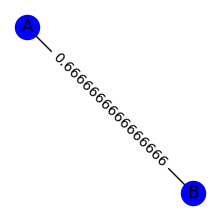

In [118]:
G = bipartite.overlap_weighted_projected_graph(B, target_nodes)

edge_labels = nx.get_edge_attributes(G, "weight")
pos = nx.spring_layout(G)
nx.draw(G, pos=pos, with_labels=True, node_color="blue")
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)
plt.show()

## `generic_weighted_projected_graph`

{'B': {'weight': 50}} {'A': {'weight': 30}, 'B': {'weight': 40}}
{'B': {'weight': 50}} {'A': {'weight': 10}, 'B': {'weight': 20}}
{'A': {'weight': 30}, 'B': {'weight': 40}} {'B': {'weight': 50}}
{'A': {'weight': 30}, 'B': {'weight': 40}} {'A': {'weight': 10}, 'B': {'weight': 20}}
{'A': {'weight': 10}, 'B': {'weight': 20}} {'A': {'weight': 30}, 'B': {'weight': 40}}
{'A': {'weight': 10}, 'B': {'weight': 20}} {'B': {'weight': 50}}


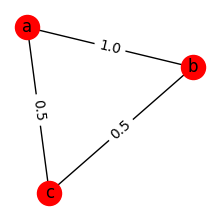

In [123]:
def jaccard(G, u, v):
    print(G[u], G[v])
    unbrs = set(G[u])
    vnbrs = set(G[v])
    return float(len(unbrs & vnbrs)) / len(unbrs | vnbrs)


G = bipartite.generic_weighted_projected_graph(B, source_nodes, weight_function=jaccard)

edge_labels = nx.get_edge_attributes(G, "weight")
pos = nx.spring_layout(G)
nx.draw(G, pos=pos, with_labels=True, node_color="red")
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)
plt.show()

# Other methods